In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1127,2020-07-26,United Kingdom,298934.0,298681.0,45779.0,45738.0,253.0,41.0
1128,2020-07-26,Germany,205768.0,205269.0,9135.0,9118.0,499.0,17.0
1129,2020-07-26,Iran,288593.0,284034.0,15321.0,15074.0,4559.0,247.0
1130,2020-07-26,Turkey,225127.0,225173.0,5597.0,5596.0,-46.0,1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3337.6130742049468
RMSE =  9131.14745391226


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  291.3480565371025
RMSE =  687.7773748201431


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  17977.29357798165
RMSE =  25819.097275452255
-- World performances for deaths --
MAE =  1560.4495412844037
RMSE =  1900.6370660598866


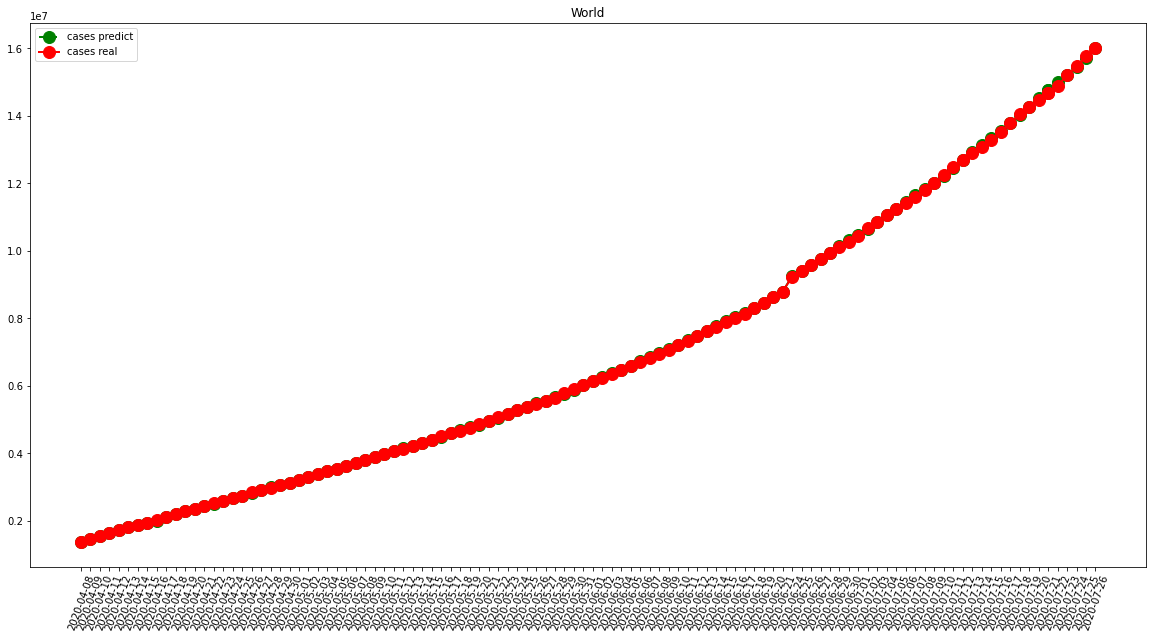

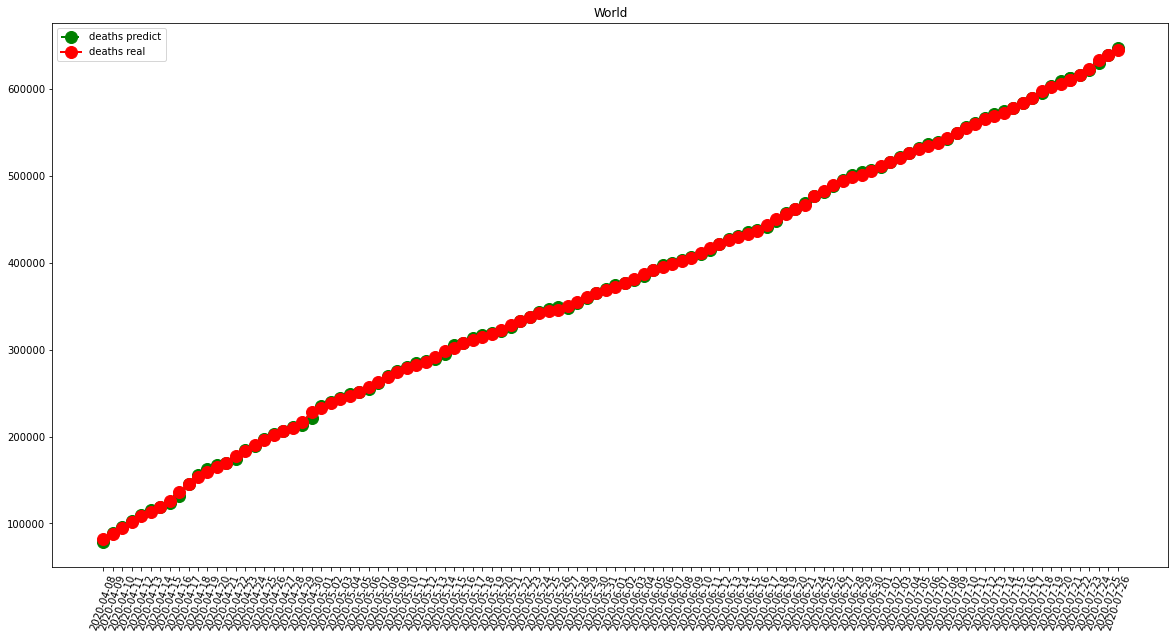

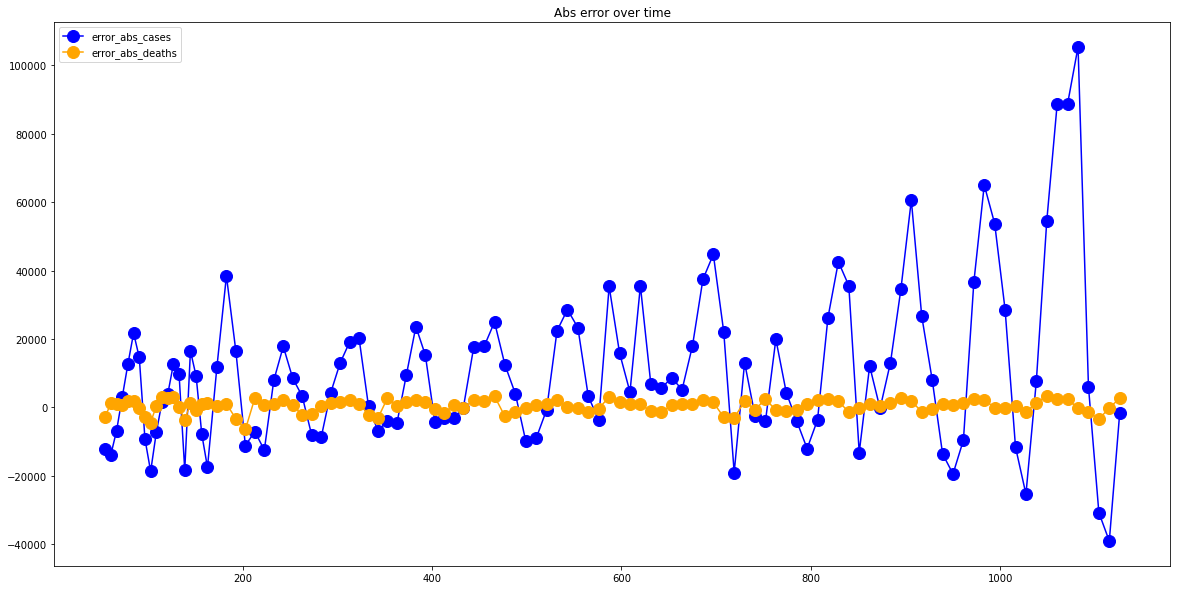

In [7]:
visShow("World")

-- France performances for cases --
MAE =  843.2521008403361
RMSE =  1370.217338461986
-- France performances for deaths --
MAE =  151.2689075630252
RMSE =  307.21819087860456


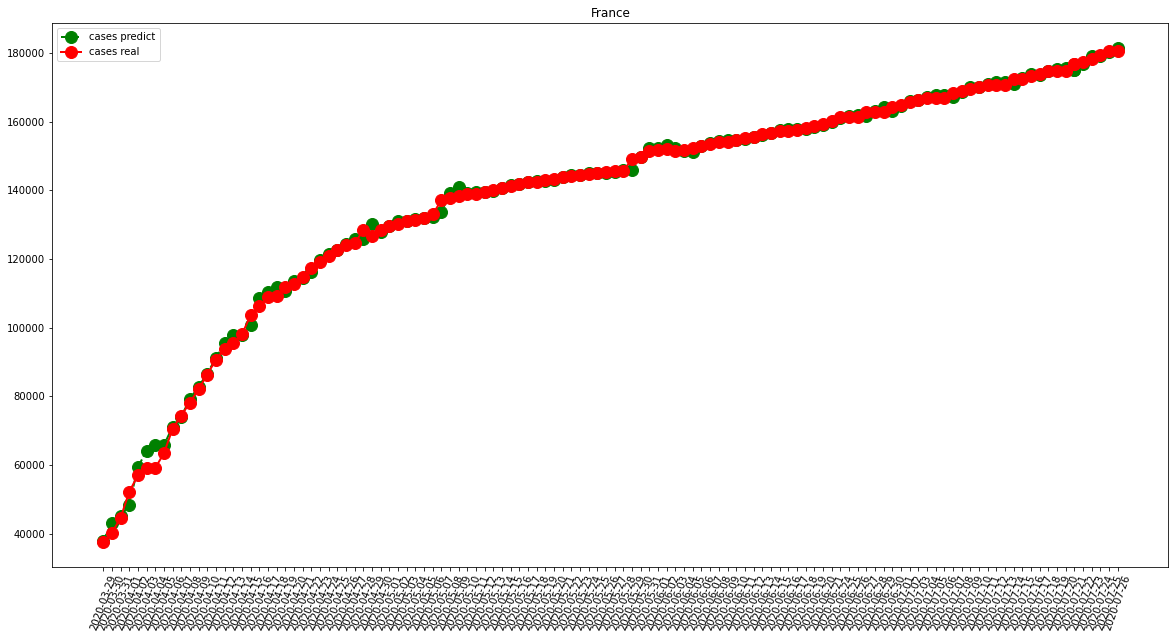

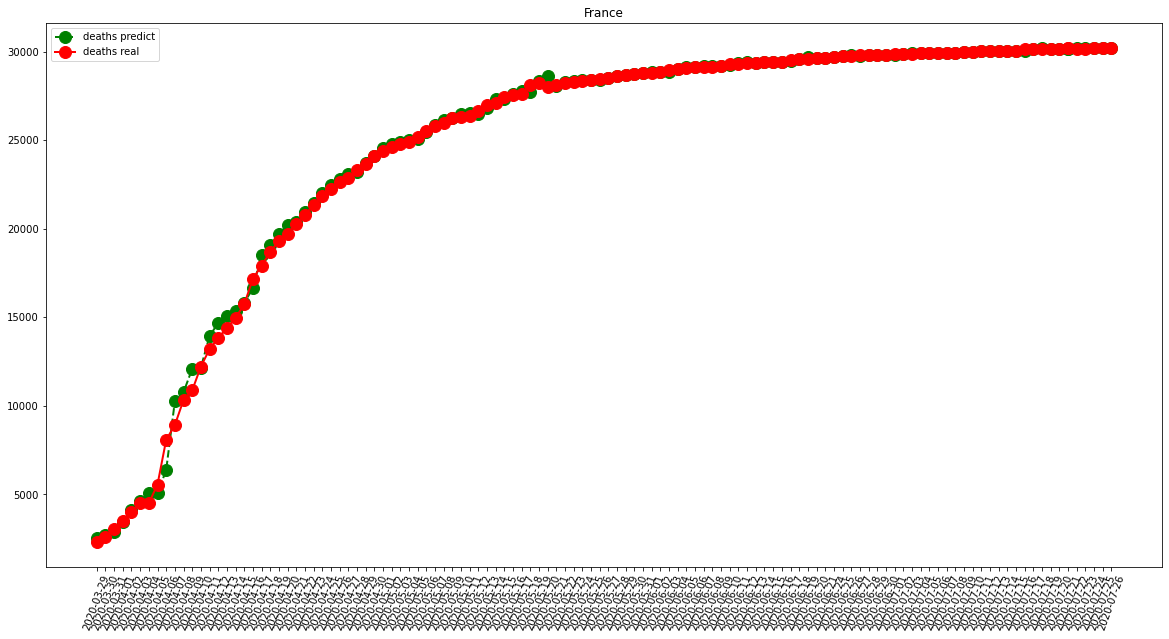

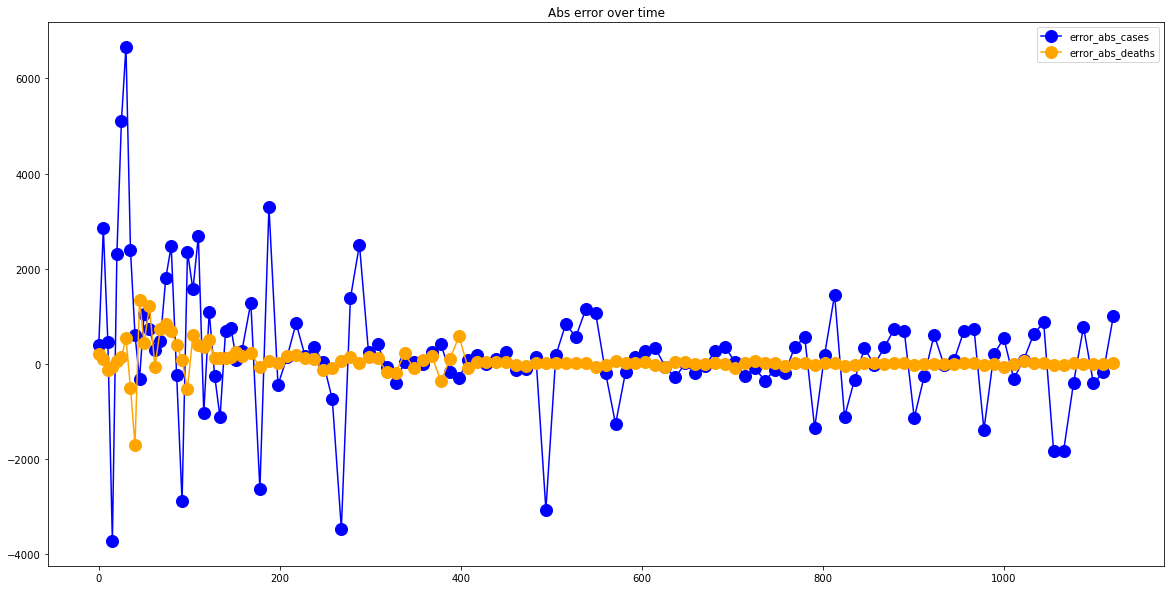

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  332.5966386554622
RMSE =  500.34531773045495
-- Italy performances for deaths --
MAE =  85.83193277310924
RMSE =  271.2855173664328


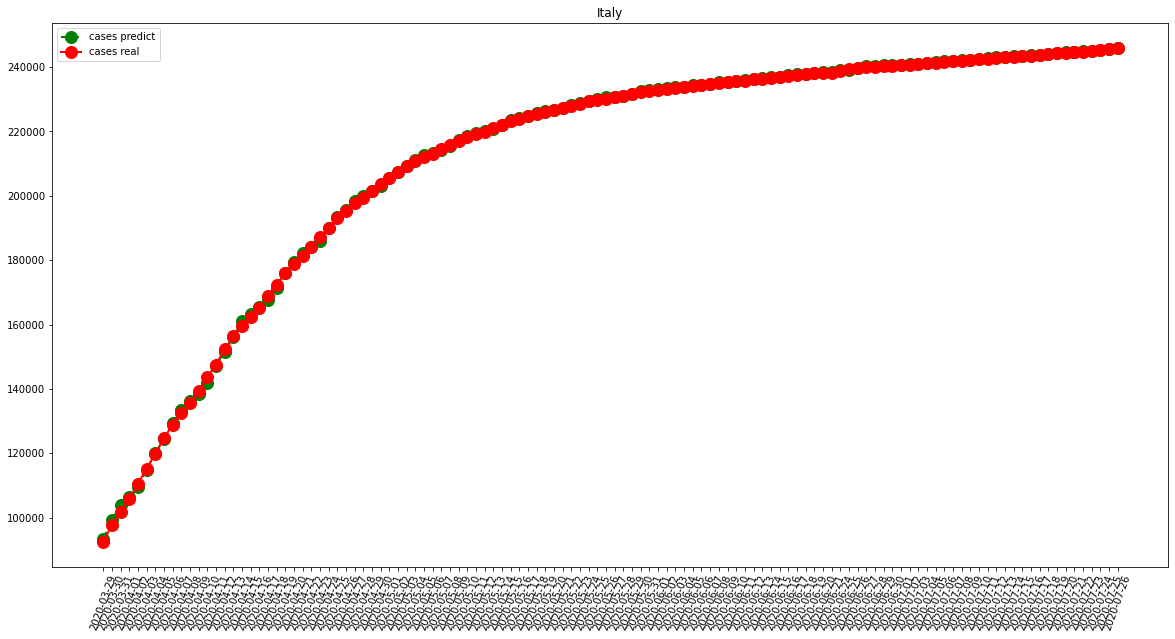

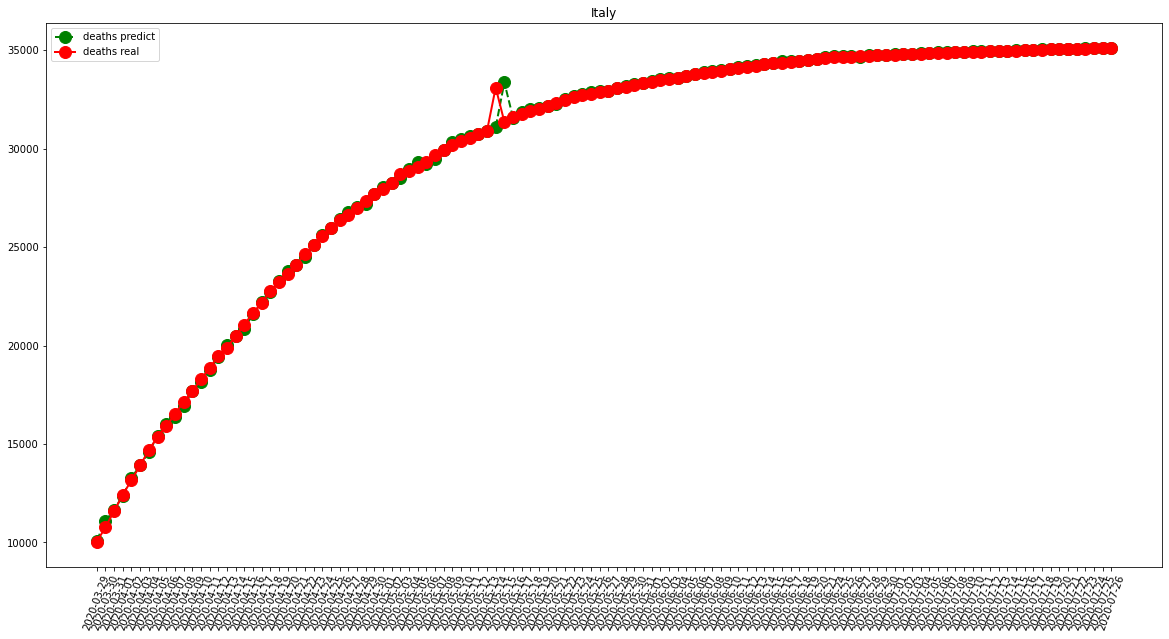

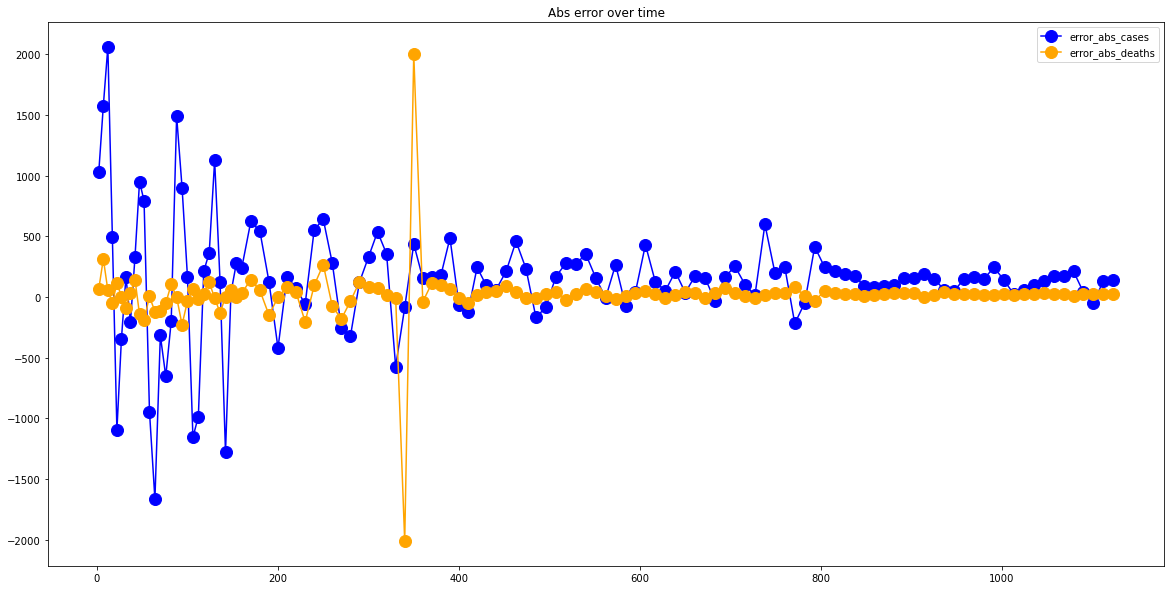

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  950.6806722689075
RMSE =  2024.8728458885528
-- Spain performances for deaths --
MAE =  154.34453781512605
RMSE =  372.103931898675


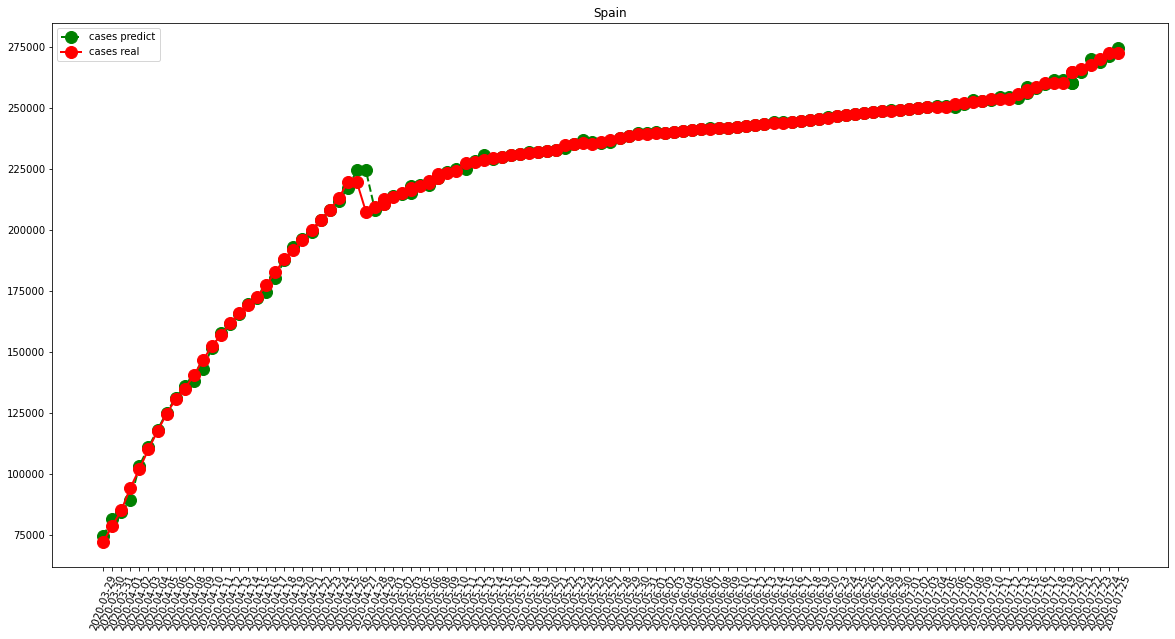

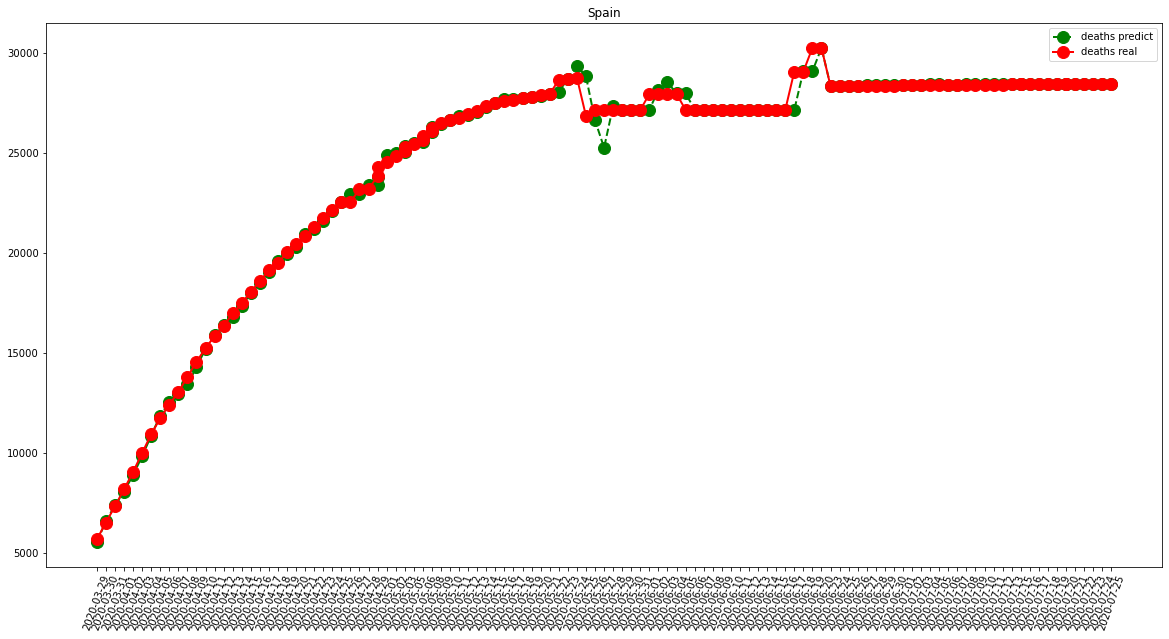

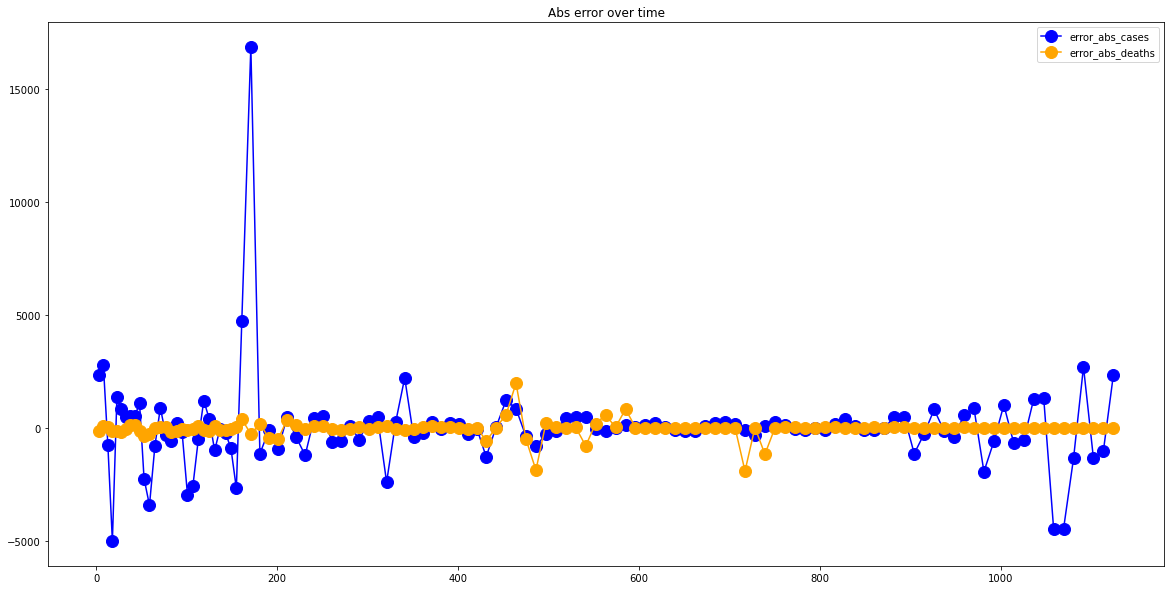

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5528.689075630252
RMSE =  7433.280548606094
-- United States performances for deaths --
MAE =  503.7731092436975
RMSE =  732.6842843300254


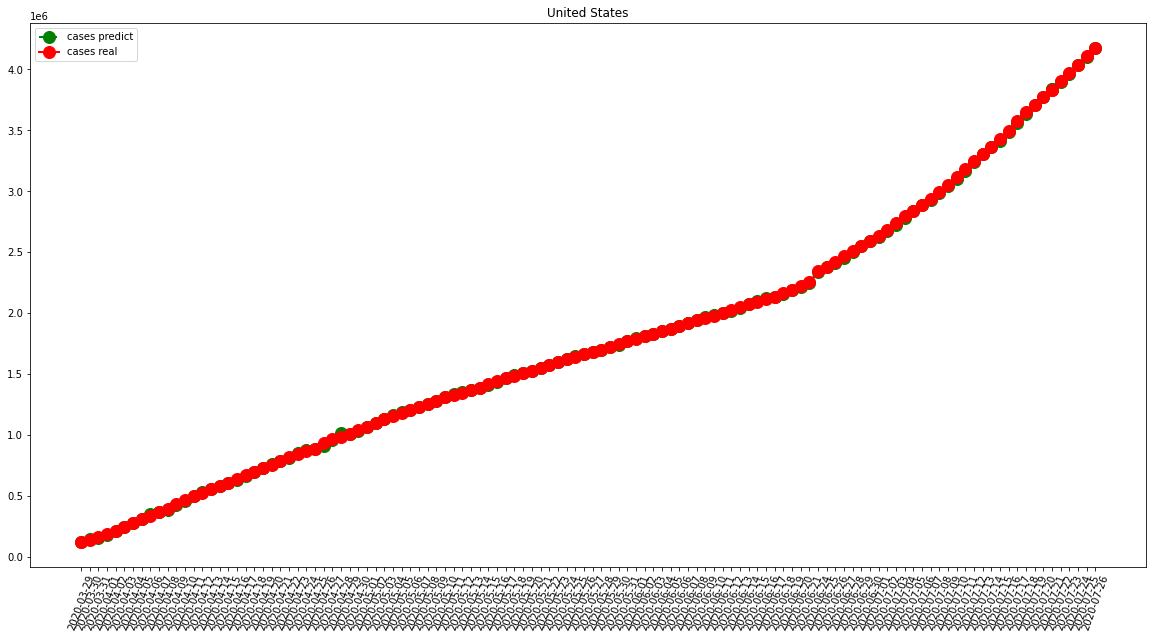

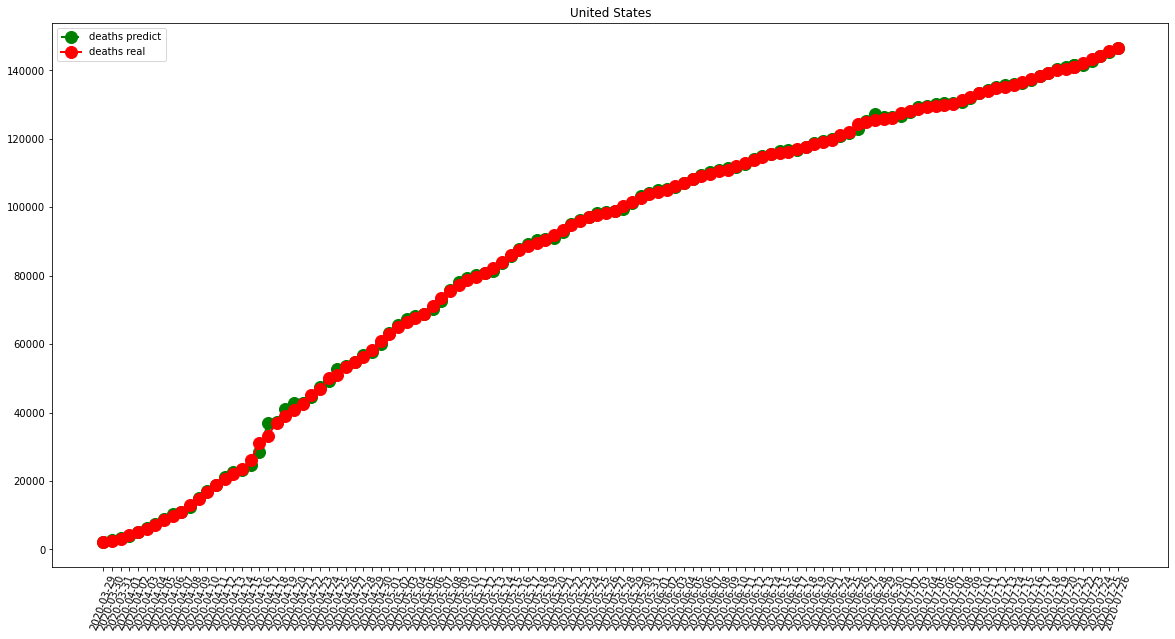

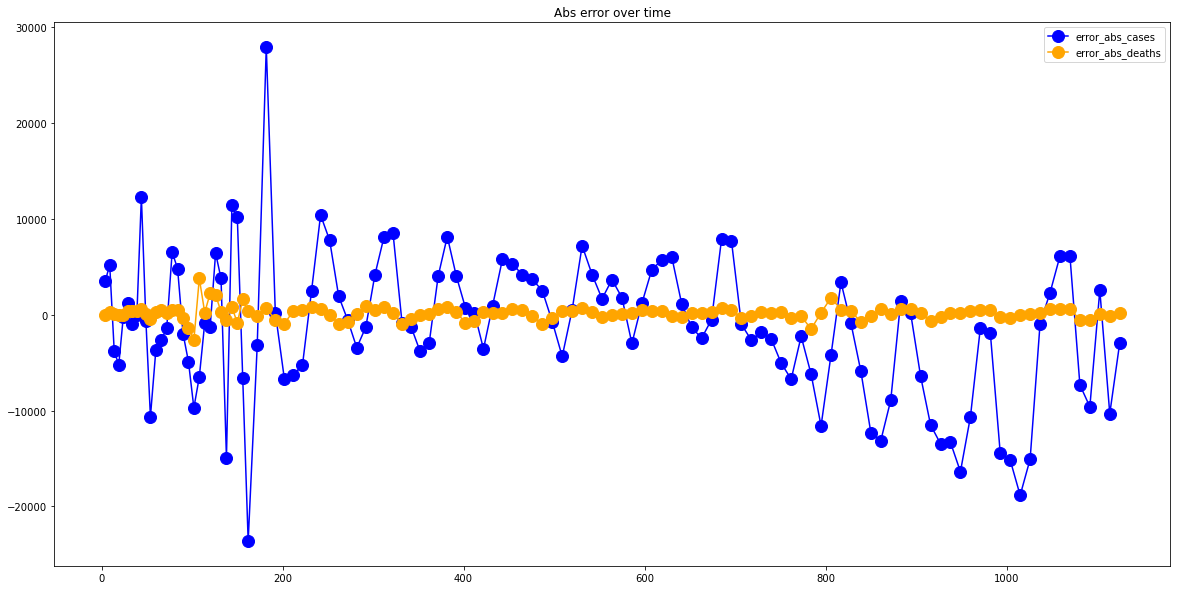

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  79.2016806722689
RMSE =  108.70610289548002
-- China performances for deaths --
MAE =  33.57983193277311
RMSE =  143.91348941977185


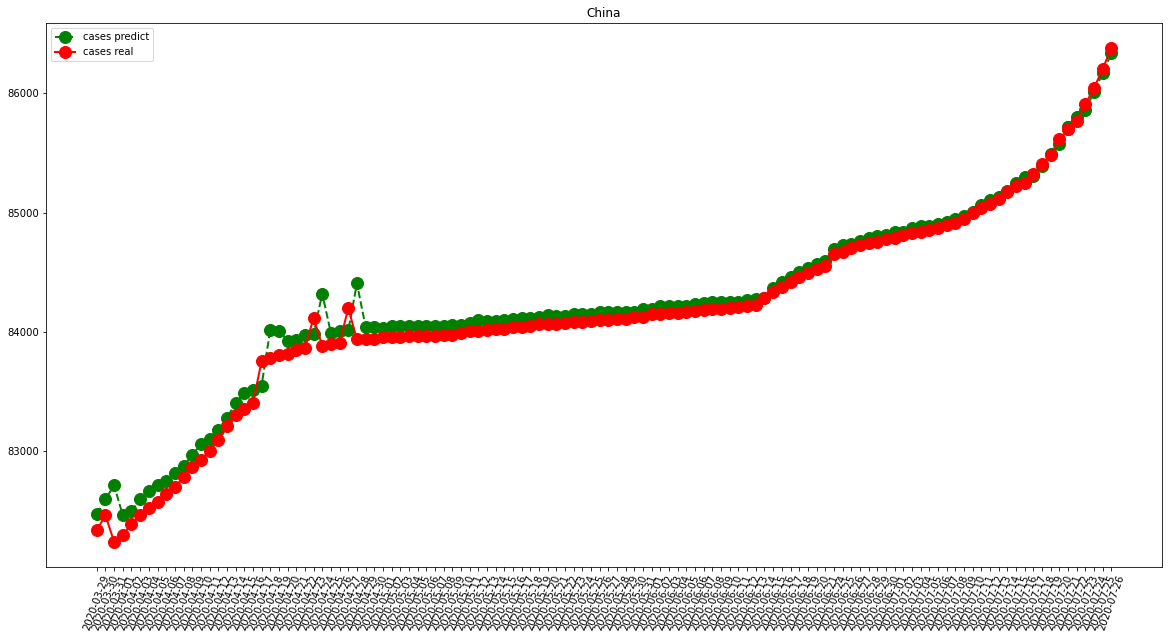

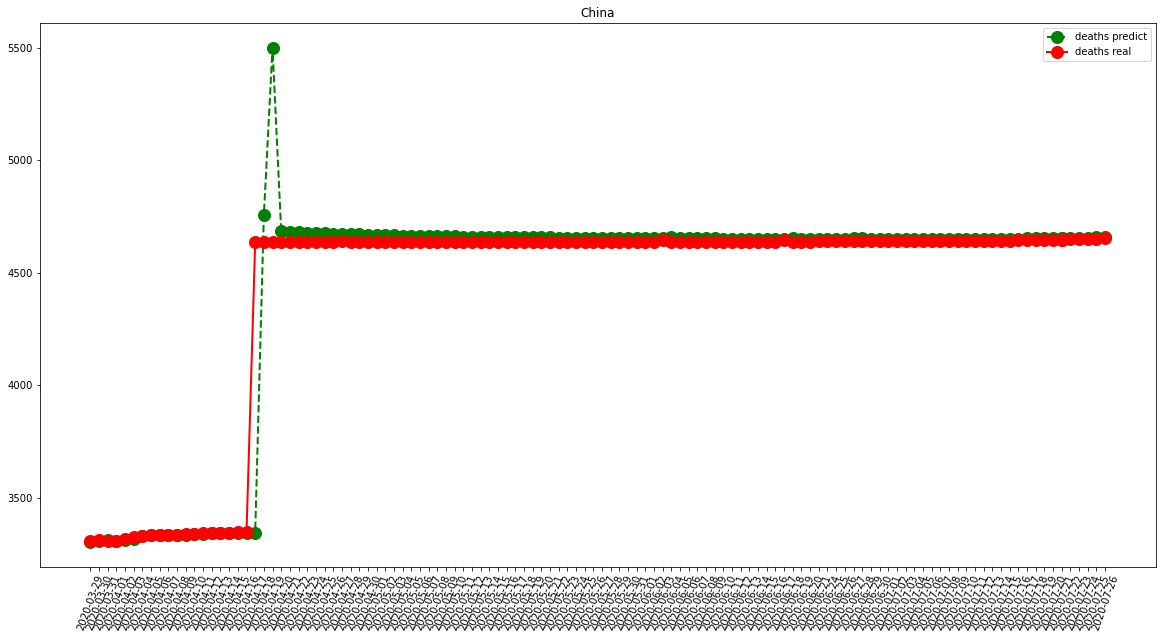

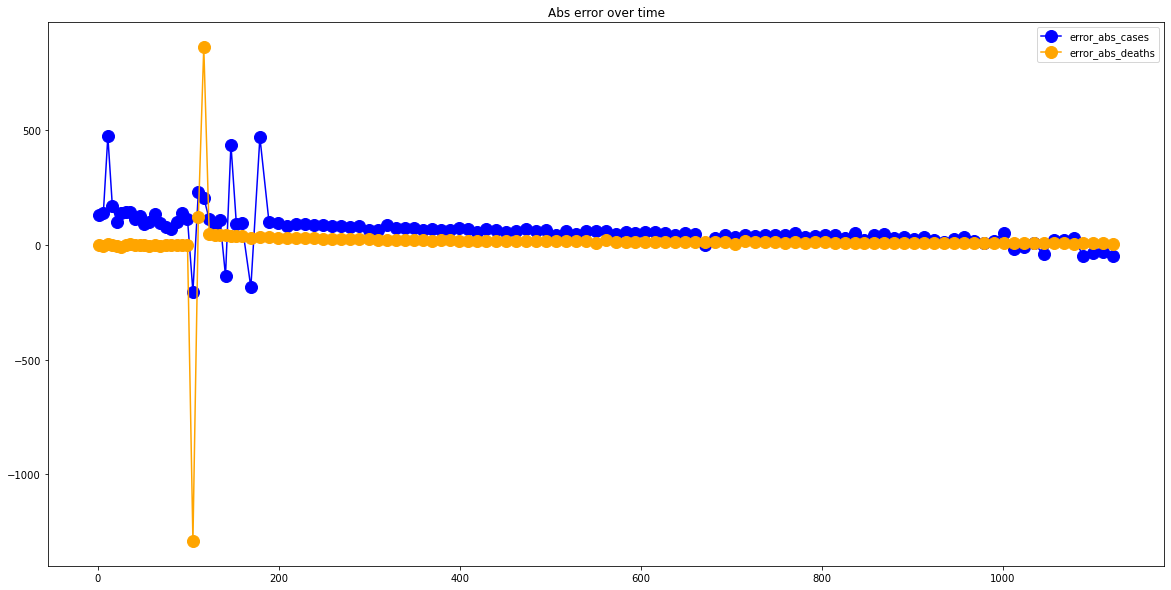

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1333.7142857142858
RMSE =  4374.647346540451
-- United Kingdom performances for deaths --
MAE =  206.97802197802199
RMSE =  514.0990732756256


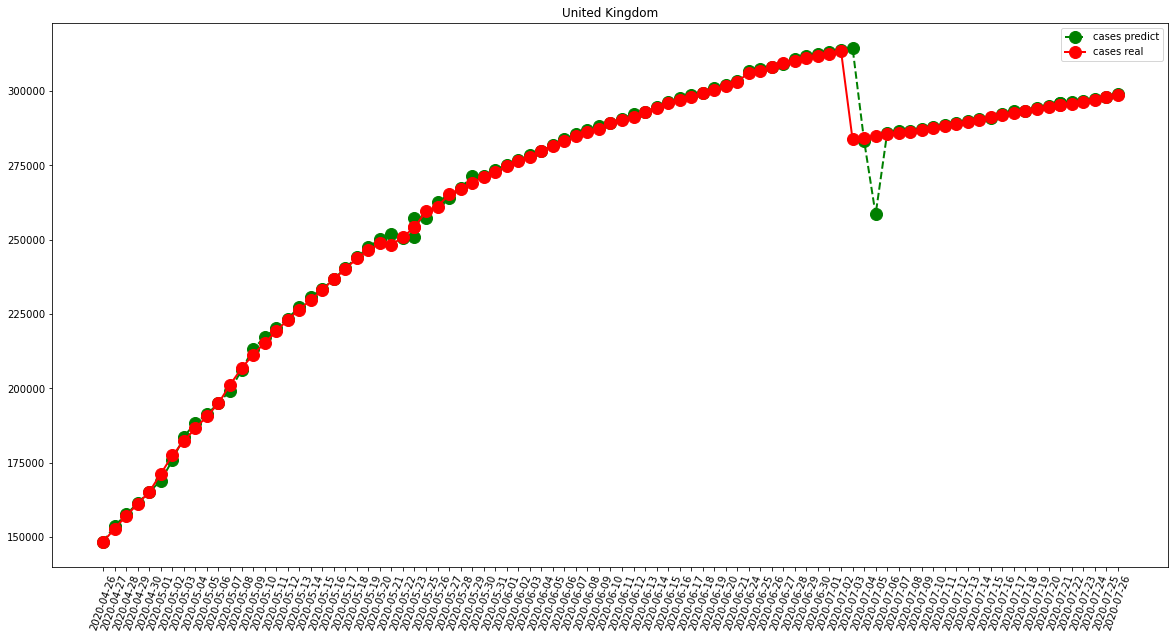

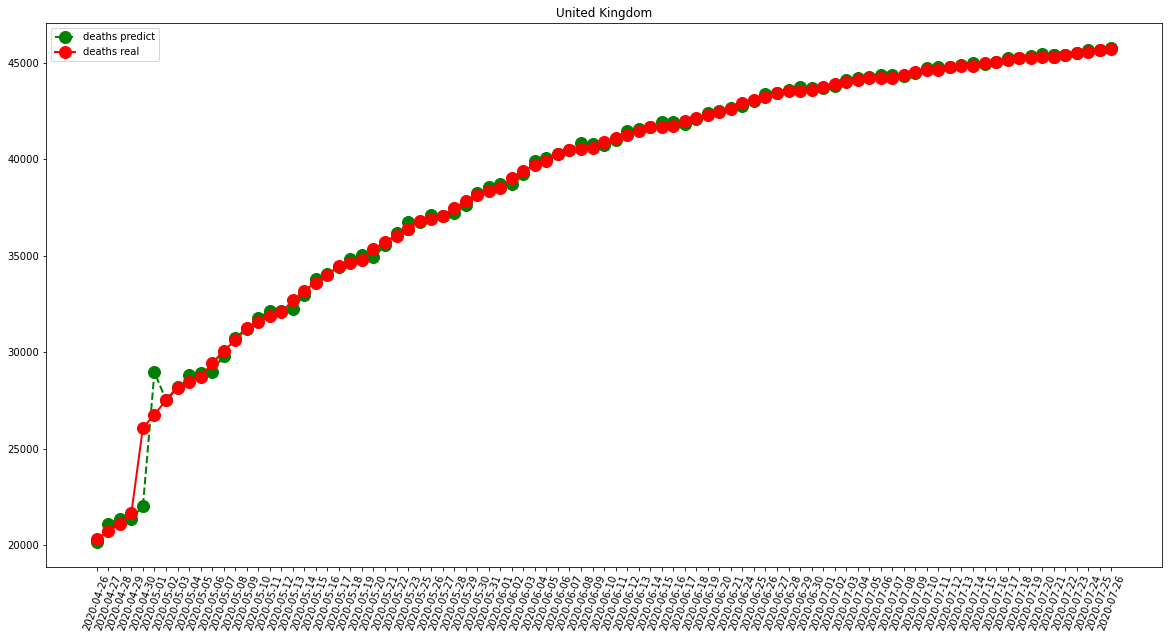

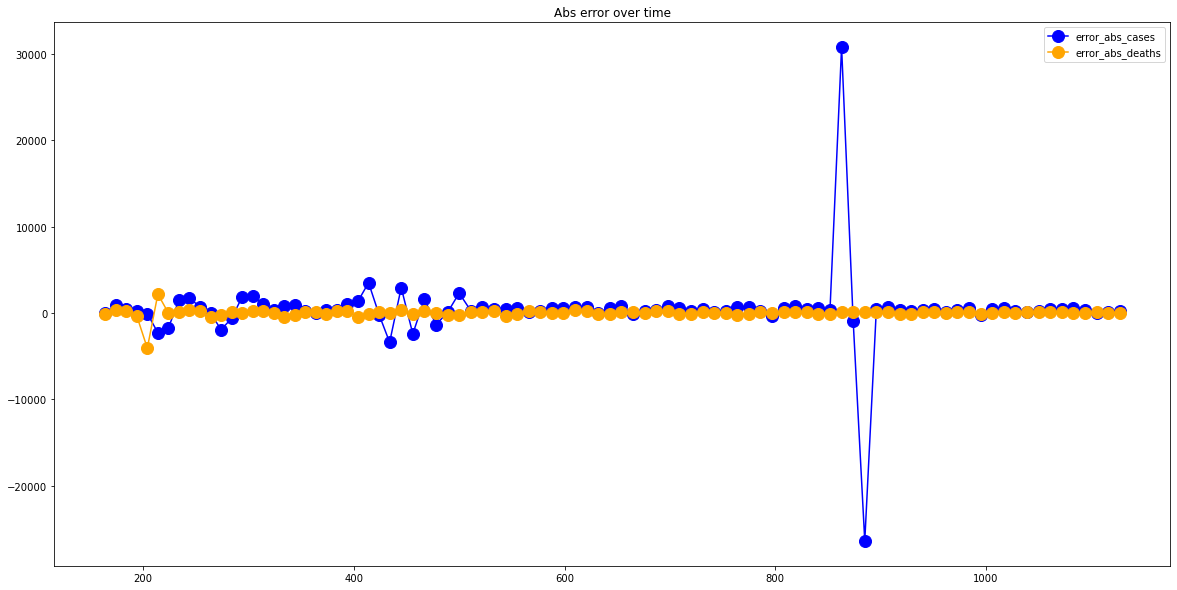

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  293.010989010989
RMSE =  408.8404401407785
-- Germany performances for deaths --
MAE =  26.32967032967033
RMSE =  45.80129083069867


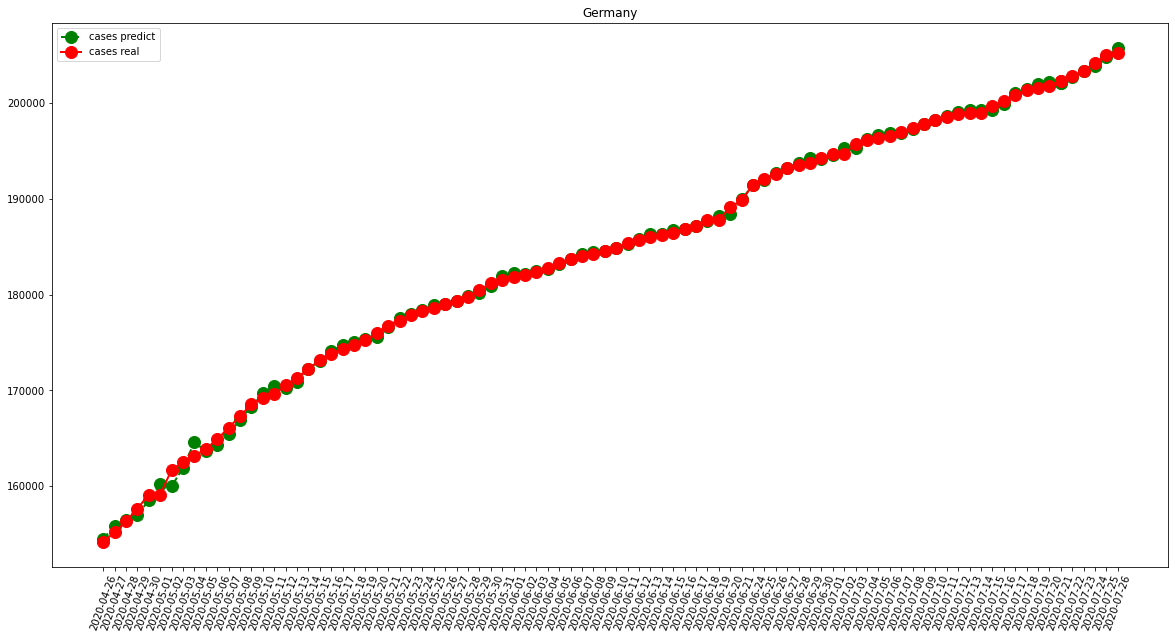

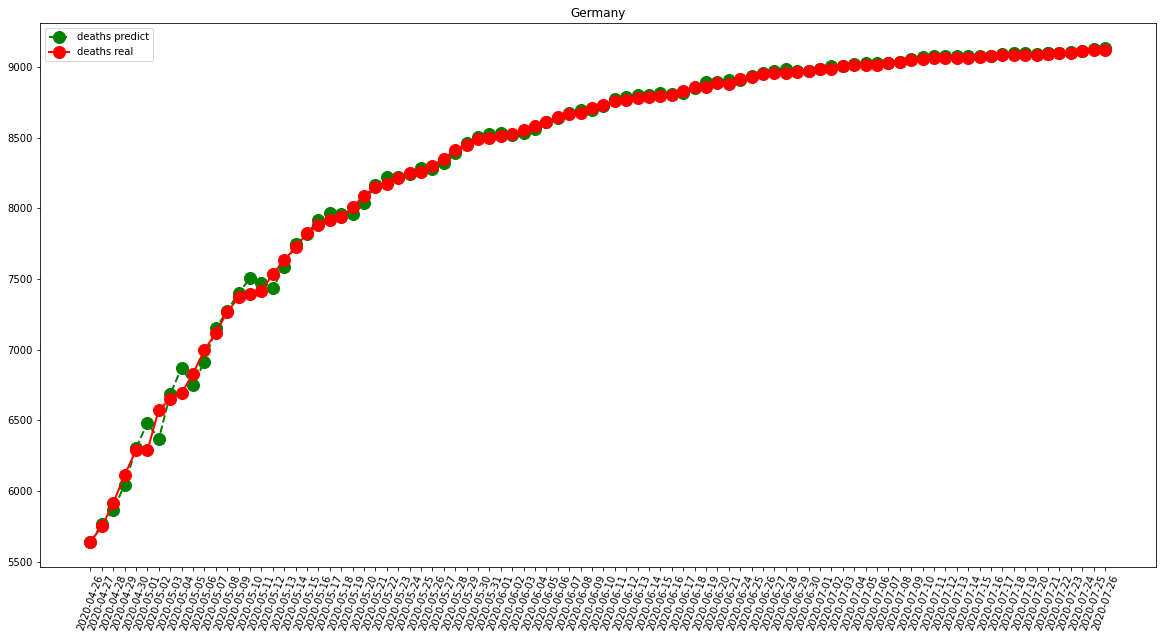

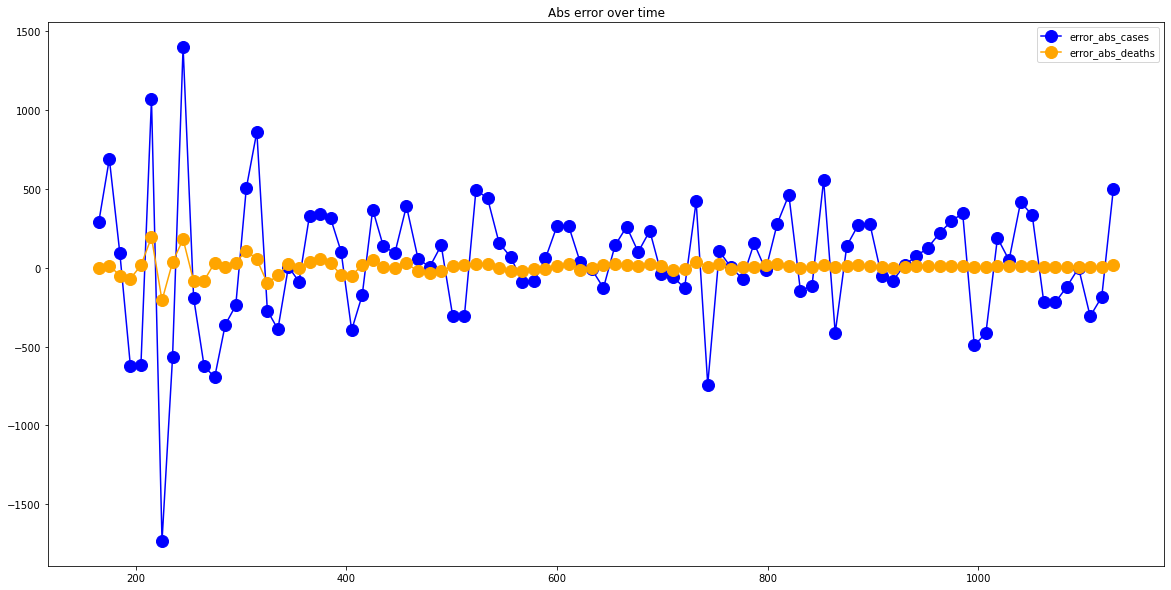

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  506.3626373626374
RMSE =  809.3597184479555
-- Iran performances for deaths --
MAE =  24.747252747252748
RMSE =  44.451479907130945


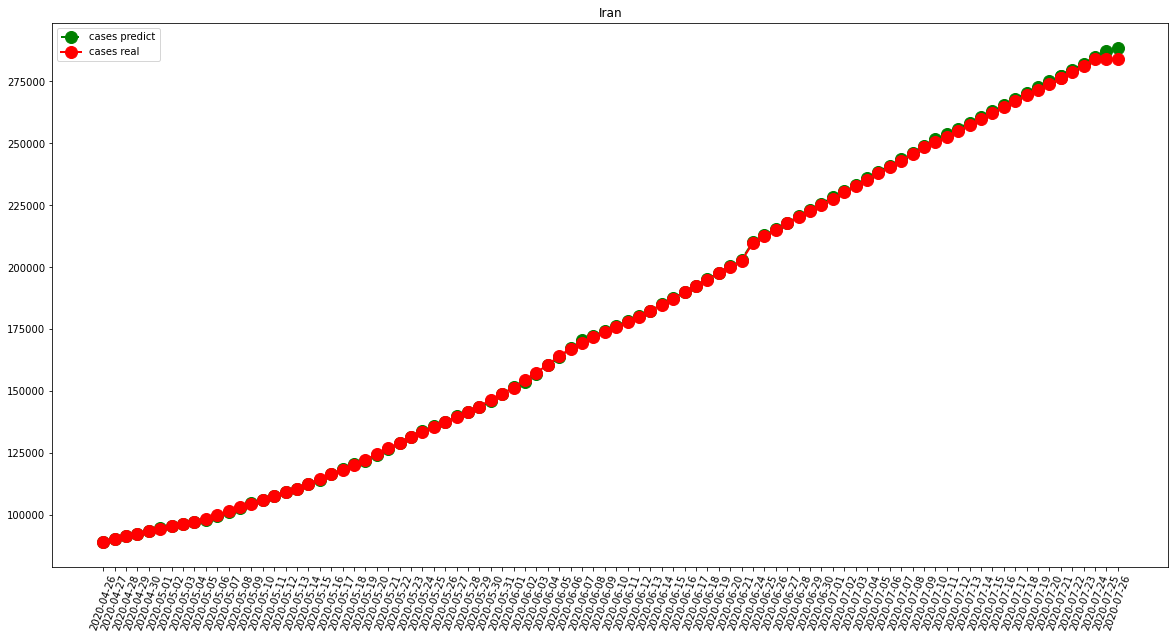

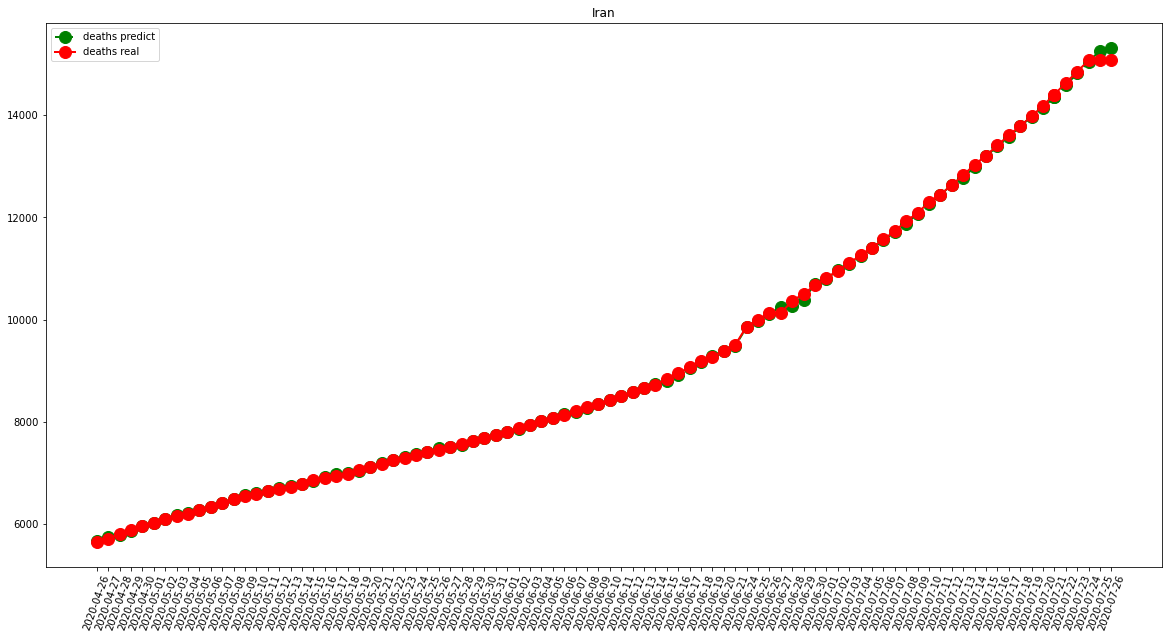

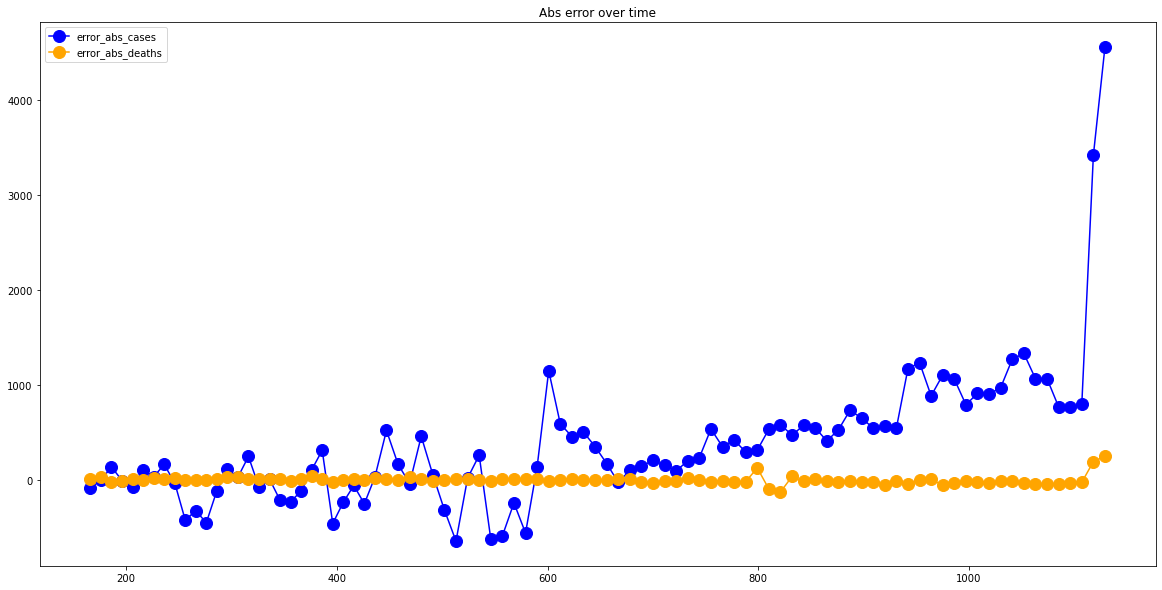

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  211.1978021978022
RMSE =  360.28277965881375
-- Turkey performances for deaths --
MAE =  20.626373626373628
RMSE =  106.40906967871729


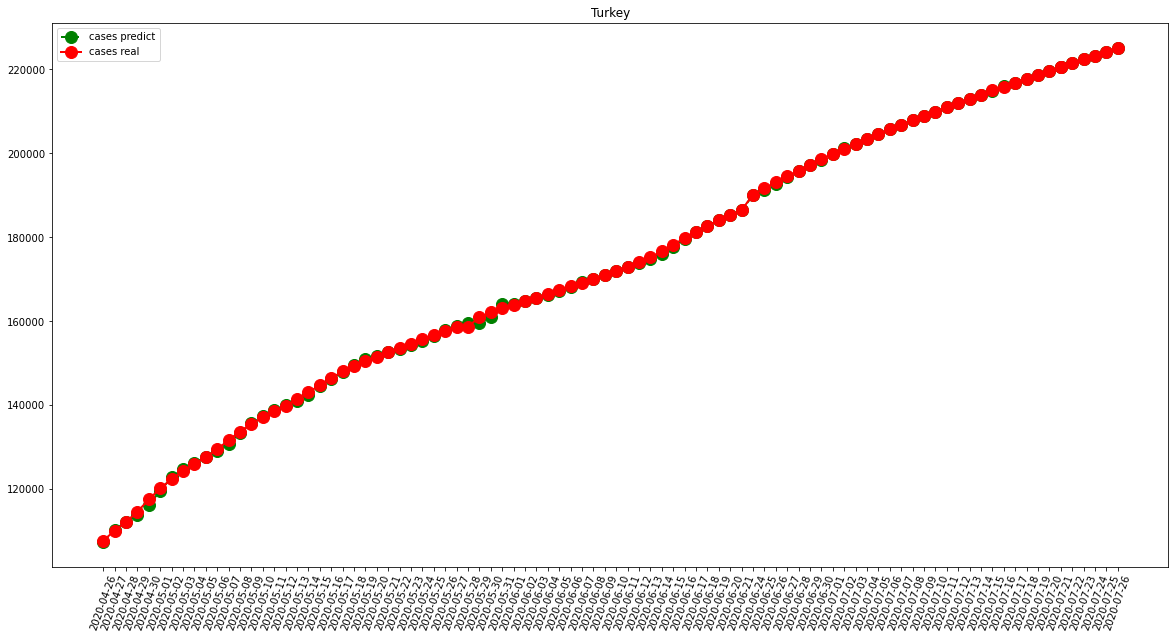

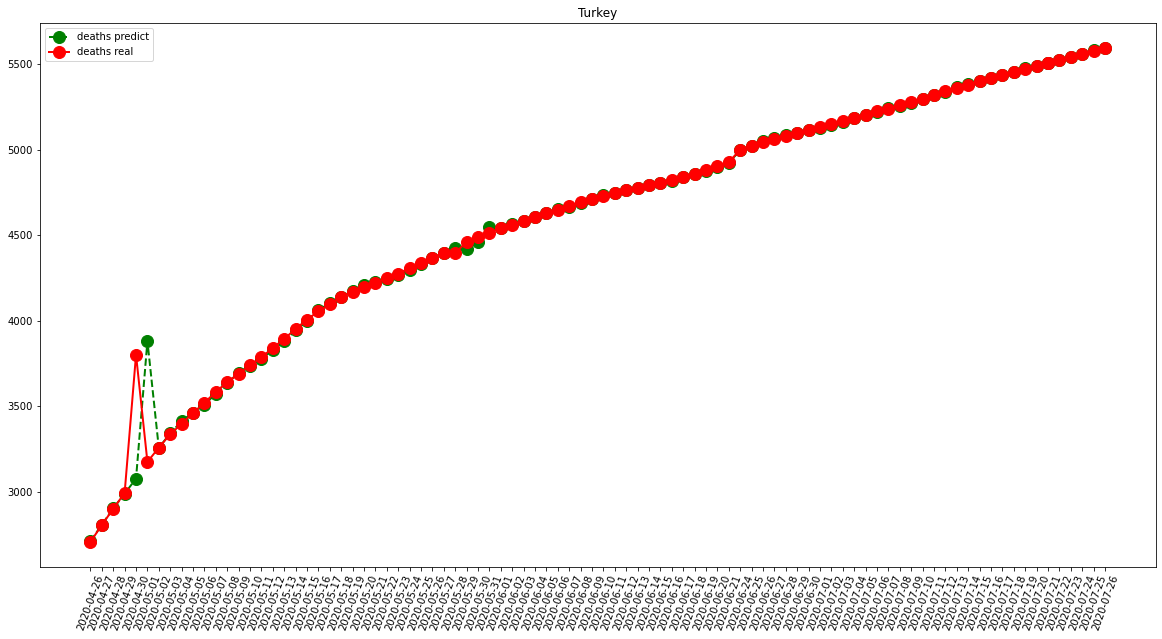

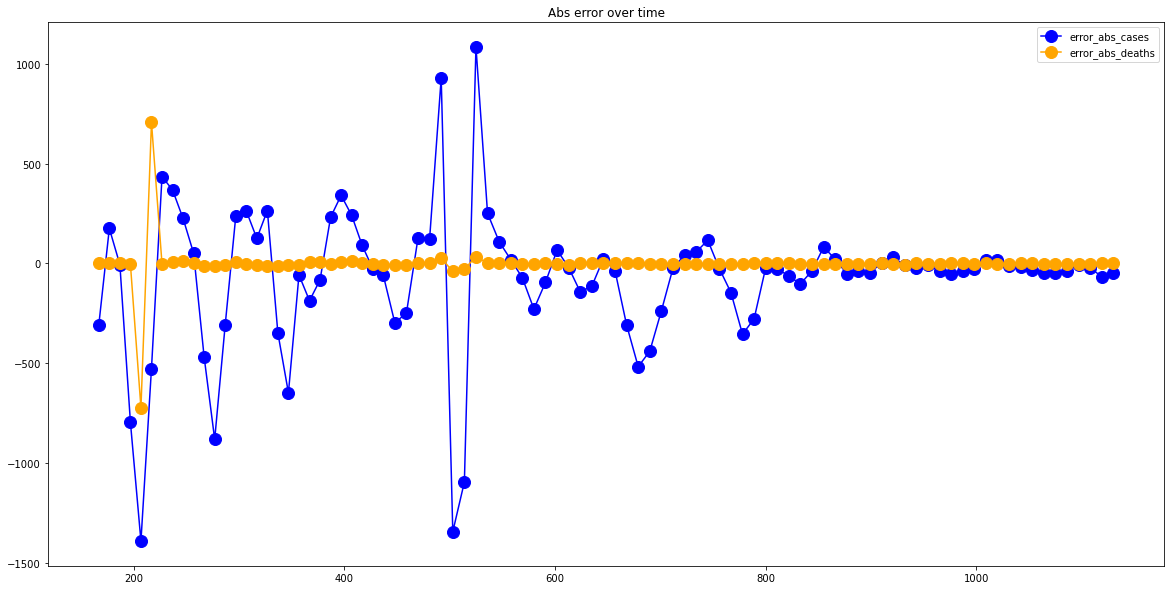

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  10701.984375
RMSE =  14017.652093097653
-- Brazil performances for deaths --
MAE =  372.34375
RMSE =  458.58576760514495


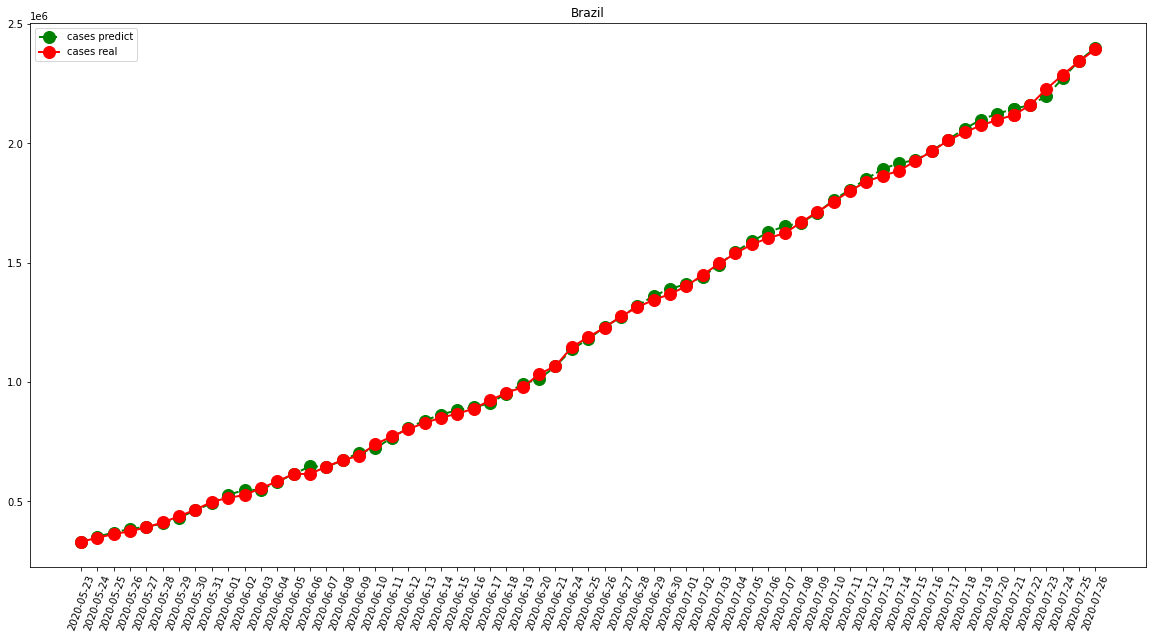

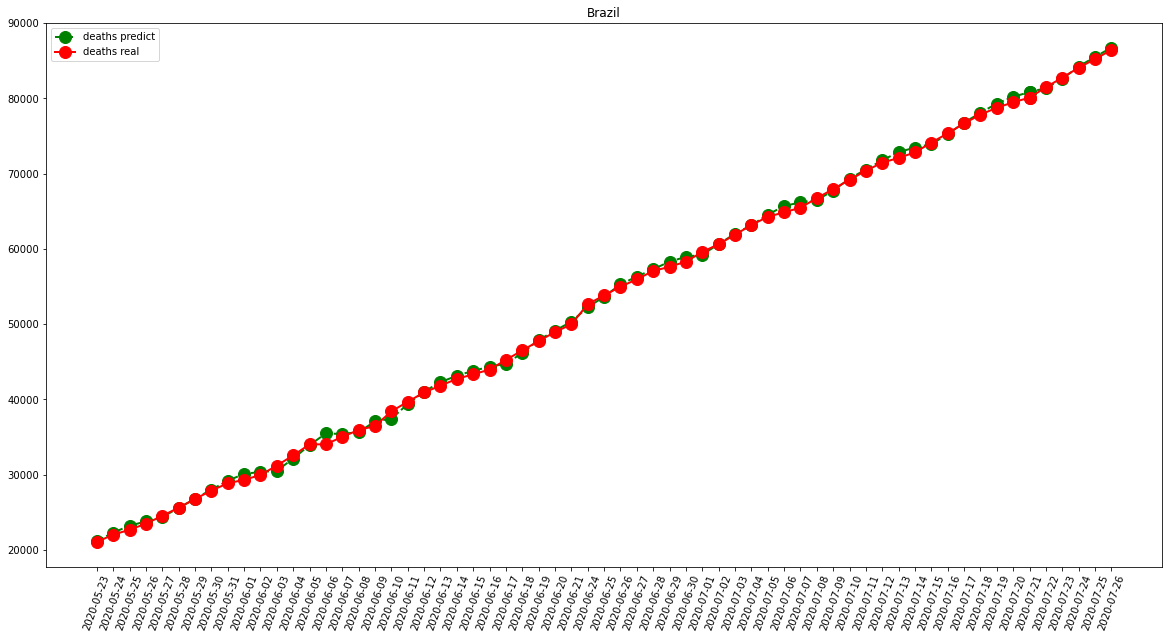

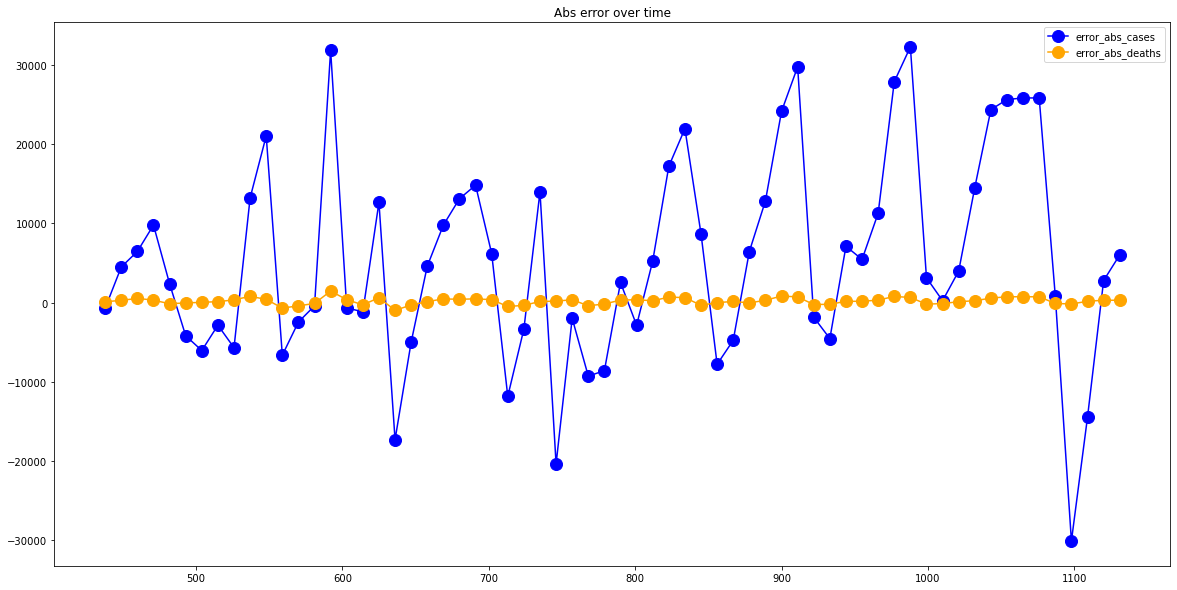

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)